# Theory

Let consider the Exponential distribution with parameter $\theta$,

$$ 
    p_{\theta}(x) = \theta e^{-\theta x}
$$

which is a PDF for $x\ge0$.

## Maximum Likelihood Estimation (MLE)

First, let us compute the Likelihood Function, 

$$
    L_{\theta}(X) = \prod^n_{i=1}p_{\theta}(x_i) = \prod^n_{i=1}\theta e^{-\theta x_i} = \theta^ne^{-\theta\sum^n_{i=1}x_i}
$$

That means the log-likelihood is,

$$ 
    l(\theta) = \log{L_{\theta}(X)} = n\log{\theta} - \theta\sum^n_{i=1}x_i
$$

To find the MLE, we take the derivative of $l(\theta)$ with respect to $\theta$ has to be zero:

$$
    \frac{dl(\theta)}{d\theta} = \frac{n}{\theta}-\sum^n_{i=1}x_i = 0
$$

Therefore, the MLE will be

$$
    \hat{\theta}_{MLE} = \operatorname*{argmax}_\theta L_{\theta}(X) = \frac{n}{\sum^n_{i=1}x_i} =  \frac{1}{\overline{x}}
$$

## Score Matching (SM) Estimation

First, we can compute the log-density,

$$
    \log{p_{\theta}(x)} = \log{\frac{\theta}{2}}-\theta|x|
$$

then, its derivative will be

$$
    \nabla_x\log{p_{\theta}(x)} = \frac{d}{dx}\log{p_{\theta}(x)} = \frac{d}{dx}(\log{\theta}-\theta x) = \frac{1}{\theta}-x
$$

The SM estimation can be computed by minimizing the Fisher Information, let us compute it

$$
    I(\theta)=\mathbb{E}\left[\left(\frac{1}{\theta}-x\right)^2\right] = \mathbb{E}\left[\frac{1}{\theta^2}+x^2-\frac{2x}{\theta}\right]
$$

# Code

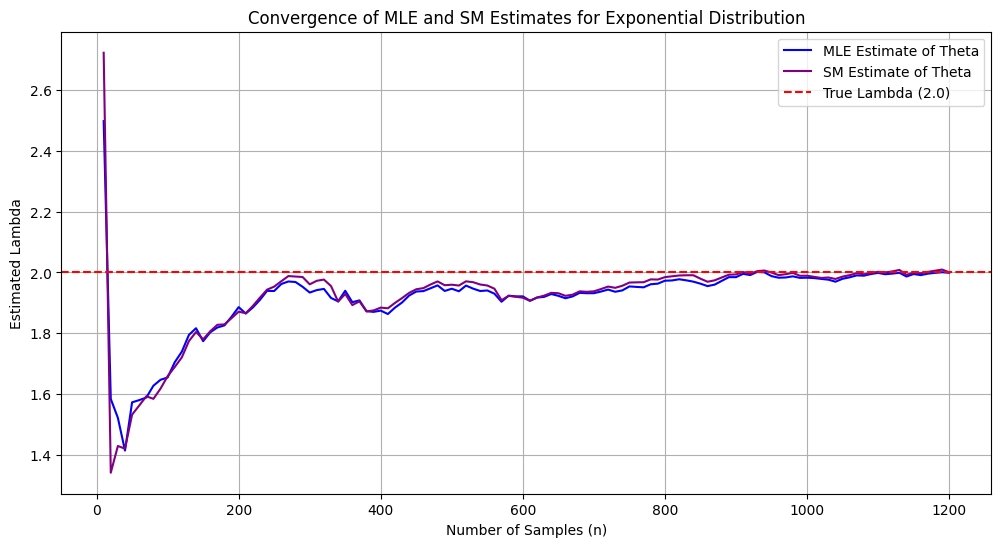

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Set true rate parameter for the exponential distribution
theta = 2.0  # True rate parameter

# Define the maximum number of samples and step size
max_samples = 1200
step_size = 10

# Generate samples from the exponential distribution
samples = np.random.exponential(scale=1/theta, size=max_samples)

# Lists to store MLE and SM estimates for theta
mle_estimates = []
sm_estimates = []

# Lists to store MLE and SM errors
mle_errors = []
sm_errors = []

# Define the errors intervals
intervals = [50, 100, 200, 400, 800, 1200]

# Perform estimation for increasing sample sizes
for n in range(step_size, max_samples + 1, step_size):
    # MLE estimation
    mle_theta = 1 / np.mean(samples[:n])
    mle_estimates.append(mle_theta)
    
    # SM estimation
    sm_theta = np.sqrt(2 / np.mean(samples[:n]**2))
    sm_estimates.append(sm_theta)

    if n in intervals:
        mle_errors.append(abs(mle_theta-theta))
        sm_errors.append(abs(sm_theta-theta))

# Plot the convergence of MLE and Score Matching estimates
plt.figure(figsize=(12, 6))
plt.plot(range(step_size, max_samples + 1, step_size), mle_estimates, label='MLE Estimate of Theta', color='blue')
plt.plot(range(step_size, max_samples + 1, step_size), sm_estimates, label='SM Estimate of Theta', color='purple')
plt.axhline(theta, color='red', linestyle='--', label=f'True Lambda ({theta})')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Lambda')
plt.title('Convergence of MLE and SM Estimates for Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

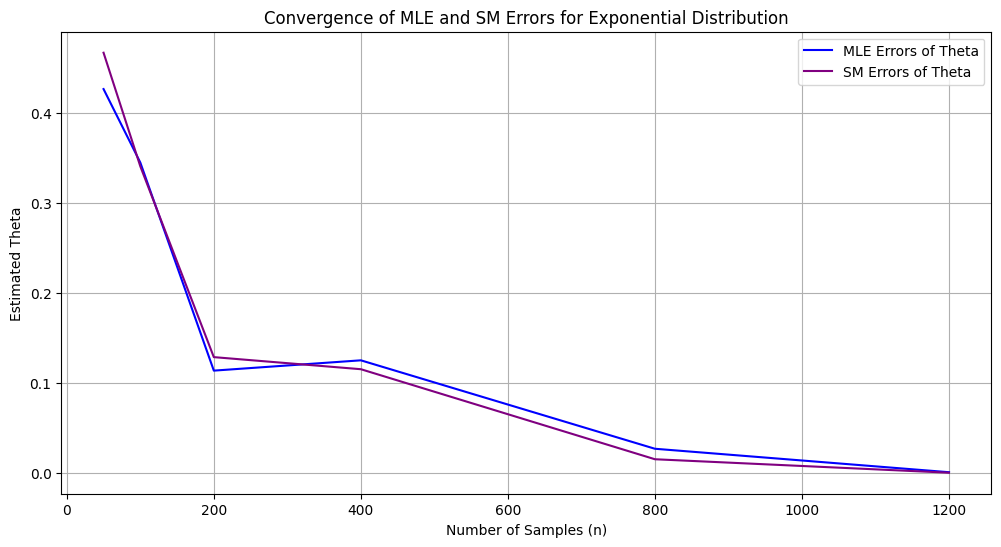

In [10]:
# Plot the convergence of MLE and SM errors
plt.figure(figsize=(12, 6))
plt.plot(intervals, mle_errors, label='MLE Errors of Theta', color='blue')
plt.plot(intervals, sm_errors, label='SM Errors of Theta', color='purple')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Theta')
plt.title('Convergence of MLE and SM Errors for Exponential Distribution')
plt.legend()
plt.grid(True)
plt.show()

For a multi-gaussian case:

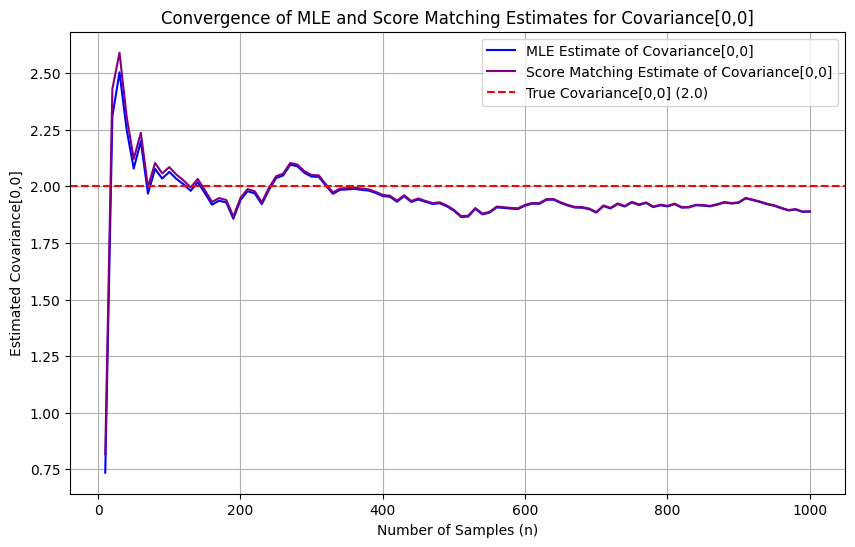

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Set true parameters for the 2D Gaussian distribution
true_mu = np.array([3, 4])
true_cov = np.array([[2, 0.5], [0.5, 1]])

np.random.seed(0)  # For reproducibility

# Define the number of samples and step size
max_samples = 1000
step_size = 10

# Generate samples from the multivariate Gaussian distribution
samples = np.random.multivariate_normal(mean=true_mu, cov=true_cov, size=max_samples)

# Lists to store MLE and Score Matching estimates for the covariance matrix's (1,1) element
mle_cov_estimates = []
sm_cov_estimates = []

# Perform estimation for increasing sample sizes
for n in range(step_size, max_samples + 1, step_size):
    # MLE estimation for mean and covariance
    mle_mu = np.mean(samples[:n], axis=0)
    mle_cov = np.cov(samples[:n], rowvar=False, bias=True)  # Use bias=True for MLE
    
    # Score Matching estimation for covariance
    # SM covariance is similar but might differ in implementation; here, we'll simulate one approach
    sm_cov = mle_cov * (n / (n - 1))  # Correct for bias in SM (similar but not identical to MLE)
    
    # Save one component of the covariance (e.g., (1,1) element) to compare
    mle_cov_estimates.append(mle_cov[0, 0])
    sm_cov_estimates.append(sm_cov[0, 0])

# Plot the convergence of MLE and Score Matching estimates for Covariance[0,0]
plt.figure(figsize=(10, 6))
plt.plot(range(step_size, max_samples + 1, step_size), mle_cov_estimates, label='MLE Estimate of Covariance[0,0]', color='blue')
plt.plot(range(step_size, max_samples + 1, step_size), sm_cov_estimates, label='Score Matching Estimate of Covariance[0,0]', color='purple')
plt.axhline(true_cov[0, 0], color='red', linestyle='--', label=f'True Covariance[0,0] ({true_cov[0, 0]})')
plt.xlabel('Number of Samples (n)')
plt.ylabel('Estimated Covariance[0,0]')
plt.title('Convergence of MLE and Score Matching Estimates for Covariance[0,0]')
plt.legend()
plt.grid(True)
plt.show()
